In [ ]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
sns.set_theme()

# load in data files and dataframe
with open('all_scores.json', 'r') as file:
    data = json.load(file)

P_x = data['positive']['valence']
N_x = data['negative']['valence']

HA_y = data['positive']['arousal_high']
LA_y = data['positive']['arousal_low']

df = pd.read_csv("dataset_final.csv", header=0)
df.rename(columns=lambda x: re.sub(r'_\d+_', '_', x), inplace=True)


In [ ]:
# select correct data
df2 = df.iloc[2:, 21:-1]
df2.reset_index(drop=True, inplace=True)
df2.index += 1

df_expl = df2.filter(regex='explanation')
df_demo = df2.filter(items=['Gender', 'Age'])

# drop the explanation and gender, age columns
df_val_arou = df2.drop(columns=df_expl.columns.tolist() + df_demo.columns.tolist())

# map values to -1 and 1
df_val_arou_mapped = df_val_arou.map(lambda value: np.interp(value, [50, 450], [-1, 1]))


In [ ]:
# make all floats
df_val_arou_mapped = df_val_arou_mapped.apply(lambda x: x.round(3) if x.dtype == 'float' else x)
df_val_arou_mapped

,S1PHA_x,S1PHA_y,S1NHA_x,S1NHA_y,S1B_x,S1B_y,S1PLA_x,S1PLA_y,S1NLA_x,S1NLA_y,...,S4PHA_x,S4PHA_y,S4NHA_x,S4NHA_y,S4B_x,S4B_y,S4NLA_x,S4NLA_y,S4PLA_x,S4PLA_y
1,0.445,0.195,0.385,0.445,-0.290,0.120,0.925,0.105,0.440,0.575,...,0.060,0.010,-0.295,0.125,0.020,0.030,0.005,0.005,0.020,-0.010
2,0.880,-0.150,-0.020,0.005,0.940,-0.175,0.910,-0.195,-0.655,-0.575,...,0.730,0.610,0.730,0.630,0.705,0.620,0.720,0.605,0.745,0.620
3,0.385,0.255,0.175,0.670,0.135,-0.215,0.250,-0.040,0.175,0.675,...,0.285,-0.280,-0.010,0.050,0.305,-0.340,0.130,-0.105,0.365,0.200
4,0.065,-0.685,-0.545,-0.075,0.075,0.305,0.755,-0.295,0.205,0.195,...,0.475,0.030,0.150,-0.245,-0.195,0.130,0.670,-0.380,0.770,0.645
5,0.325,0.160,-0.435,-0.115,0.050,-0.040,-0.115,-0.180,-0.280,0.085,...,0.030,0.095,-0.020,0.090,0.110,0.225,-0.005,-0.050,0.015,-0.145
6,-0.390,-0.455,-0.520,0.175,0.005,0.030,0.020,0.010,-0.160,0.290,...,0.020,-0.020,0.825,-0.005,0.520,0.020,0.935,-0.030,0.575,0.025
7,0.690,-0.640,0.285,-0.575,0.675,0.690,0.775,0.120,-0.770,0.140,...,0.515,-0.195,0.325,0.000,0.475,-0.275,-0.440,0.000,0.455,-0.295
8,0.280,0.620,0.095,0.570,0.440,0.450,0.260,-0.290,0.280,0.265,...,0.145,0.435,0.920,0.170,0.300,-0.425,0.585,0.760,0.605,0.775
9,0.720,-0.595,-0.030,0.045,0.205,-0.255,0.830,-0.105,-0.515,0.325,...,0.800,-0.425,0.405,0.170,-0.020,-0.020,-0.030,-0.020,0.910,0.550
10,0.005,0.175,-0.375,-0.030,-0.025,0.020,-0.005,-0.020,0.135,0.175,...,0.305,-0.335,0.555,-0.420,0.440,-0.230,0.780,-0.560,0.305,-0.300


In [ ]:
new_data = {}
correlation_df = []

# append classes to new data with correct actual class scores
for column_name in df_val_arou_mapped.columns:
    if '_x' in column_name:
        if 'P' in column_name:
            actual_x = P_x    
        elif 'N' in column_name:
            actual_x = N_x
        elif 'B' in column_name:
            actual_x = 0

        new_data[column_name] = actual_x
    elif '_y' in column_name:
        if 'HA' in column_name:
            actual_y = HA_y
        elif 'LA' in column_name:
            actual_y = LA_y
        elif 'B' in column_name:
            actual_y = 0 
        new_data[column_name] = actual_y
    

# Make one big dataframe of actual classes and participant values
for index, row in df_val_arou_mapped.iterrows():
    x_and_y = []
    for i, col_name in enumerate(df_val_arou_mapped.columns, 1):
        x_and_y.append(col_name)
        if i % 2 == 0:
            
            pair_name = col_name.replace("_x", "").replace("_y", "")
            correlation_df.append({
                    'Participant': index,
                    'Pair': pair_name,
                    'Classification': pair_name.replace("S1", "").replace("S2", "").replace("S3", "").replace( "S4", ""),
                    'Participant_x': row[x_and_y[0]],
                    'Participant_y': row[x_and_y[1]],
                    'Actual_x': new_data[x_and_y[0]],
                    'Actual_y': new_data[x_and_y[1]],
                    'Actual_xy': np.array((new_data[x_and_y[0]], new_data[x_and_y[1]]))
                })
            x_and_y.clear()
df_new = pd.DataFrame(correlation_df)
df_new

,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]"
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]"
2,1,S1B,B,-0.290,0.120,0.0,0.0,"[0, 0]"
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]"
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]"
...,...,...,...,...,...,...,...,...
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]"
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]"
497,25,S4B,B,0.575,0.300,0.0,0.0,"[0, 0]"
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]"


In [ ]:
# assign labels 
def assign_label(row):
    if row['Participant_x_n'] >= 0:
        if row['Participant_y_n'] >= 0:
            return 'PHA'
        elif row['Participant_y_n'] < 0:
            return 'PLA'
    elif row['Participant_x_n'] < 0:
        if row['Participant_y_n'] >= 0:
            return 'NHA'
        elif row['Participant_y_n'] < 0:
            return 'NLA'
    return 'Neutral'  

In [ ]:
big_df = pd.DataFrame()

# normalization with own baseline for each stage
for participant in df_new['Participant'].unique():
    for i in range(1,5): # stage numbers
        selection_df = df_new.query(f"Participant == {participant}").query(f"Pair.str.contains('{i}')")
        selection_b = selection_df.query(f"Pair.str.contains('B')")

        new_selection_df = selection_df.assign(
                Participant_x_n=lambda x: np.clip(round(x.Participant_x - selection_b.Participant_x.values[0], 3), -1, 1),
                Participant_y_n=lambda y: np.clip(round(y.Participant_y - selection_b.Participant_y.values[0], 3), -1, 1)
        )

        new_selection_df['Prediction'] = new_selection_df.apply(assign_label, axis=1)
        big_df = pd.concat([big_df, new_selection_df], ignore_index=True)


big_df

,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy,Participant_x_n,Participant_y_n,Prediction
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]",0.735,0.075,PHA
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]",0.675,0.325,PHA
2,1,S1B,B,-0.290,0.120,0.0,0.0,"[0, 0]",0.000,0.000,PHA
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]",1.000,-0.015,PLA
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]",0.730,0.455,PHA
...,...,...,...,...,...,...,...,...,...,...,...
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]",0.160,0.290,PHA
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]",0.275,0.160,PHA
497,25,S4B,B,0.575,0.300,0.0,0.0,"[0, 0]",0.000,0.000,PHA
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]",-1.000,0.470,NHA


In [ ]:
# make tuple pairs and calculate euclidean distance
big_df = big_df.assign(
    Participant_xy_n = big_df.apply(
        lambda row: np.array([row.Participant_x_n, row.Participant_y_n]), axis=1
    )
)

big_df = big_df.assign(
    Participant_dist = big_df.apply(
    lambda row: np.linalg.norm(row.Participant_xy_n - np.array(row.Actual_xy)), axis=1
    )
)

big_df = big_df.query('Classification != "B"')
big_df

,Participant,Pair,Classification,Participant_x,Participant_y,Actual_x,Actual_y,Actual_xy,Participant_x_n,Participant_y_n,Prediction,Participant_xy_n,Participant_dist
0,1,S1PHA,PHA,0.445,0.195,0.5,0.5,"[0.5, 0.5]",0.735,0.075,PHA,"[0.735, 0.075]",0.485644
1,1,S1NHA,NHA,0.385,0.445,-0.5,0.5,"[-0.5, 0.5]",0.675,0.325,PHA,"[0.675, 0.325]",1.187960
3,1,S1PLA,PLA,0.925,0.105,0.5,-0.5,"[0.5, -0.5]",1.000,-0.015,PLA,"[1.0, -0.015]",0.696581
4,1,S1NLA,NLA,0.440,0.575,-0.5,-0.5,"[-0.5, -0.5]",0.730,0.455,PHA,"[0.73, 0.455]",1.557217
5,1,S2PHA,PHA,0.285,-0.300,0.5,0.5,"[0.5, 0.5]",0.565,-0.415,PLA,"[0.565, -0.415]",0.917306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,25,S3NLA,NLA,0.645,0.615,-0.5,-0.5,"[-0.5, -0.5]",0.105,1.000,PHA,"[0.105, 1.0]",1.617413
495,25,S4PHA,PHA,0.735,0.590,0.5,0.5,"[0.5, 0.5]",0.160,0.290,PHA,"[0.16, 0.29]",0.399625
496,25,S4NHA,NHA,0.850,0.460,-0.5,0.5,"[-0.5, 0.5]",0.275,0.160,PHA,"[0.275, 0.16]",0.846301
498,25,S4NLA,NLA,-0.435,0.770,-0.5,-0.5,"[-0.5, -0.5]",-1.000,0.470,NHA,"[-1.0, 0.47]",1.091284


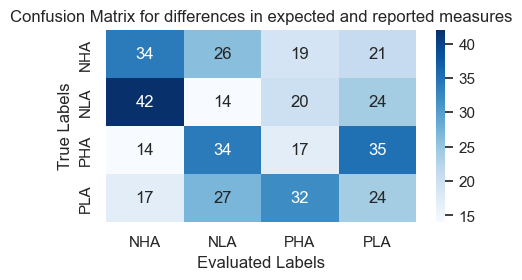

Accuracy: 0.2225
              precision    recall  f1-score   support

         NHA       0.32      0.34      0.33       100
         NLA       0.14      0.14      0.14       100
         PHA       0.19      0.17      0.18       100
         PLA       0.23      0.24      0.24       100

    accuracy                           0.22       400
   macro avg       0.22      0.22      0.22       400
weighted avg       0.22      0.22      0.22       400



In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generate the confusion matrix from the big_df DataFrame
cm = confusion_matrix(big_df.Classification, big_df.Prediction)

# Define the class labels (adjust based on the number of classes)
class_labels = np.unique(big_df.Classification)

# Create a DataFrame for easier plotting with Seaborn
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(5, 2.5))  # Adjust the figure size as needed
ax = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", cbar=True)

# Add title and axis labels
plt.title('Confusion Matrix for differences in expected and reported measures')
plt.xlabel('Evaluated Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

# Calculate and print the accuracy
accuracy = accuracy_score(big_df.Classification, big_df.Prediction)
print("Accuracy:", accuracy)

# Generate the classification report
report = classification_report(big_df.Classification, big_df.Prediction, labels=np.unique(big_df.Classification))
print(report)


In [ ]:
# euclidean distance
calculations = big_df.groupby("Classification").agg({"Participant_dist": "mean"})
calculations = calculations.eval("Percentage_dist = Participant_dist/2*100")
calculations

,Participant_dist,Percentage_dist
Classification,,
NHA,0.775038,38.751885
NLA,0.907286,45.364284
PHA,0.891411,44.570558
PLA,0.872507,43.625333


Text(0, 0.5, 'Arousal')

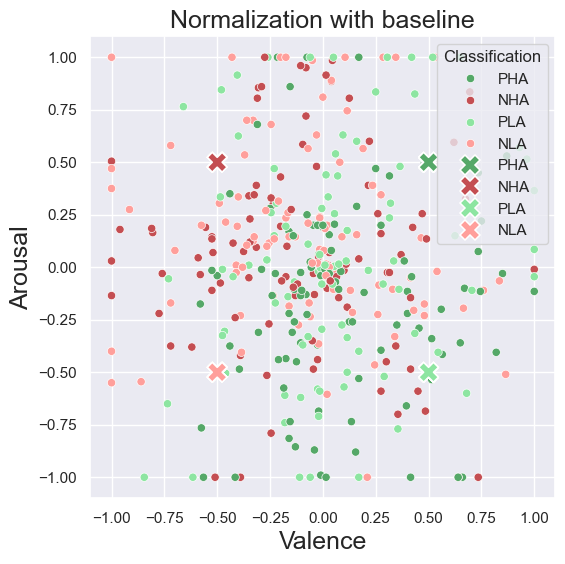

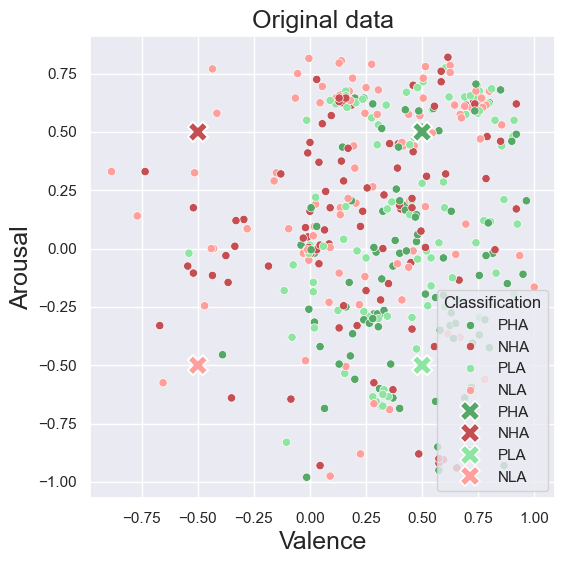

In [ ]:

# Create the first plot with normalized values
fig, ax = plt.subplots(1, figsize=(6, 6))

sns.scatterplot(data=big_df, x="Participant_x_n", y="Participant_y_n", hue="Classification", palette=['#55a868', '#c44e52', '#8de5a1', '#ff9f9b'])
sns.scatterplot(data=big_df, x="Actual_x", y="Actual_y", hue="Classification", marker='X', s=200, palette=['#55a868', '#c44e52', '#8de5a1', '#ff9f9b'])

ax.set_title('Normalization with baseline', fontsize=18)
ax.set_xlabel("Valence", fontsize=18)
ax.set_ylabel("Arousal", fontsize=18)


fig, ax = plt.subplots(1, figsize=(6, 6))

sns.scatterplot(data=big_df, x="Participant_x", y="Participant_y", hue="Classification", palette=['#55a868', '#c44e52', '#8de5a1', '#ff9f9b'])
sns.scatterplot(data=big_df, x="Actual_x", y="Actual_y", hue="Classification", marker='X', s=200, palette=['#55a868', '#c44e52', '#8de5a1', '#ff9f9b'])

ax.set_title('Original data', fontsize=18)
ax.set_xlabel("Valence", fontsize=18)
ax.set_ylabel("Arousal", fontsize=18)

In [169]:
participant_df = big_df[['Participant_x_n', 'Participant_y_n', 'Classification']].copy()
participant_df = participant_df.rename(columns={'Participant_x_n': 'x', 'Participant_y_n': 'y'})
participant_df['Type'] = 'Participant'

actual_df = big_df[['Actual_x', 'Actual_y', 'Classification']].copy()
actual_df = actual_df.rename(columns={'Actual_x': 'x', 'Actual_y': 'y'})
actual_df['Type'] = 'Ground_truth'

# Combine into one DataFrame
combined_df = pd.concat([participant_df, actual_df])

pp = combined_df.query("Type == 'Participant'").eval("Class = Classification")
gt = combined_df.query("Type == 'Ground_truth'").eval("Class = Type")

combined_df = pd.concat([pp, gt])
combined_df

,x,y,Classification,Type,Class
0,0.735,0.075,PHA,Participant,PHA
1,0.675,0.325,NHA,Participant,NHA
3,1.000,-0.015,PLA,Participant,PLA
4,0.730,0.455,NLA,Participant,NLA
5,0.565,-0.415,PHA,Participant,PHA
...,...,...,...,...,...
494,-0.500,-0.500,NLA,Ground_truth,Ground_truth
495,0.500,0.500,PHA,Ground_truth,Ground_truth
496,-0.500,0.500,NHA,Ground_truth,Ground_truth
498,-0.500,-0.500,NLA,Ground_truth,Ground_truth


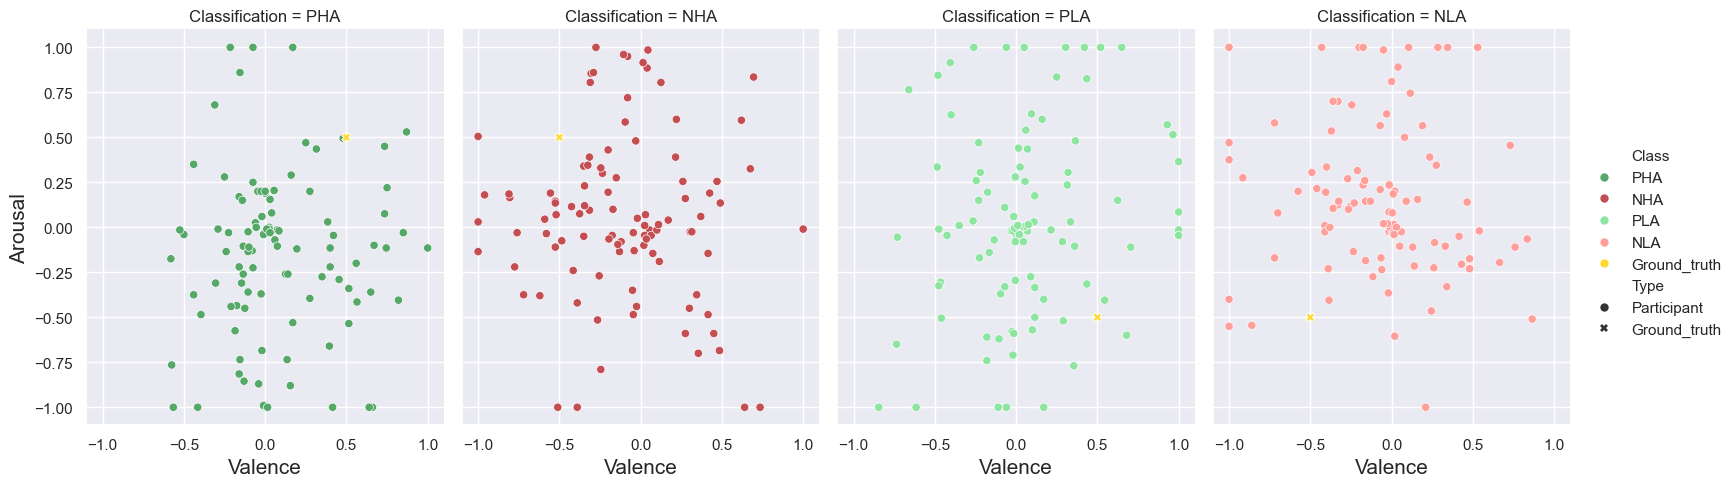

In [175]:
r = sns.relplot(data=combined_df, x="x", y="y", hue='Class', col="Classification", style="Type", col_wrap=4, kind="scatter", aspect=.8, palette=['#55a868', '#c44e52', '#8de5a1', '#ff9f9b','#FFD92F'])
r.set_axis_labels("Valence", "Arousal", fontsize=15)